#Data from the collected survey

In [10]:
import pymongo
import pandas as pd

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["survey_data"]
collection = db["users"]

# Fetch data from the collection
cursor = collection.find({}, {'_id': 0, 'name': 1, 'age': 1, 'gender': 1, 'total_income': 1})

# Convert cursor to a DataFrame
df = pd.DataFrame(list(cursor))

# Display the DataFrame
df


name age  gender total_income
0        John  30  Male\t       5000\t
1        Jane  25  Female             
2        Jane  25  Female       4500\t
3       Alice  35  Female         6000
4         Bob  28    Male         4800
5       Emily  40  Female         5500
6     Michael  32    Male         5200
7      Sophia  27  Female         4700
8   William\t  45    Male         5800
9      Olivia  29  Female         4900
10      James  38    Male         6300
11       Ella  26  Female         4600
12  Alexander  33    Male         5100
13      Mia\t  31  Female         5400
14   Benjamin  42    Male         6000
15  Charlotte  30  Female         5200

In [11]:
# Remove records with missing values
df.dropna(inplace=True)

In [16]:
# Remove records with empty strings in 'total_income'
df = df[df['total_income'] != '']

In [17]:
# Display the DataFrame after removing incomplete and duplicate records
print("\nAfter removing incomplete and duplicate records:")
print(df)


After removing incomplete and duplicate records:
         name age  gender total_income
0        John  30  Male\t       5000\t
2        Jane  25  Female       4500\t
3       Alice  35  Female         6000
4         Bob  28    Male         4800
5       Emily  40  Female         5500
6     Michael  32    Male         5200
7      Sophia  27  Female         4700
8   William\t  45    Male         5800
9      Olivia  29  Female         4900
10      James  38    Male         6300
11       Ella  26  Female         4600
12  Alexander  33    Male         5100
13      Mia\t  31  Female         5400
14   Benjamin  42    Male         6000
15  Charlotte  30  Female         5200


In [19]:
# Clean data to remove \t from all columns
df = df.replace('\t', '', regex=True)

In [20]:
# Display the DataFrame after cleaning
print("\nAfter cleaning:")
print(df)


After cleaning:
         name age  gender total_income
0        John  30    Male         5000
2        Jane  25  Female         4500
3       Alice  35  Female         6000
4         Bob  28    Male         4800
5       Emily  40  Female         5500
6     Michael  32    Male         5200
7      Sophia  27  Female         4700
8     William  45    Male         5800
9      Olivia  29  Female         4900
10      James  38    Male         6300
11       Ella  26  Female         4600
12  Alexander  33    Male         5100
13        Mia  31  Female         5400
14   Benjamin  42    Male         6000
15  Charlotte  30  Female         5200


In [22]:
# Fetch data from the collection
cursor = collection.find({}, {'_id': 0, 'name': 1, 'age': 1, 'gender': 1, 'total_income': 1,
                              'expenses.utilities': 1, 'expenses.entertainment': 1, 
                              'expenses.school_fees': 1, 'expenses.shopping': 1, 'expenses.healthcare': 1})


In [23]:
# Convert cursor to a DataFrame
df = pd.DataFrame(list(cursor))

The third step
Data Processing with Python or R:

Create a Python or R class named "User."
Loop through the collected data and store it in a CSV file.
Load the CSV file into a Jupyter notebook.

In [2]:
import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv('C:/Users/USER/Downloads/user_data.csv')

# Display DataFrame
df


Name  Age  Gender  Total Income  Utilities  Entertainment  \
0        John   30    Male          5000        200            300   
1        Jane   25  Female          4500        150            250   
2       Alice   35  Female          6000        250            400   
3         Bob   28    Male          4800        180            220   
4       Emily   40  Female          5500        220            350   
5     Michael   32    Male          5200        240            380   
6      Sophia   27  Female          4700        160            280   
7     William   45    Male          5800        280            450   
8      Olivia   29  Female          4900        190            320   
9       James   38    Male          6300        300            500   
10       Ella   26  Female          4600        170            290   
11  Alexander   33    Male          5100        230            360   
12        Mia   31  Female          5400        260            420   
13   Benjamin   42    Male          6000        270            480   
14  Charlotte   30  Female          5200        240            380   

    School Fees  Shopping  Healthcare  
0           400       500         100  
1           350       450          80  
2           300       600         120  
3           370       420          90  
4           450       550         150  
5           420       480         130  
6           320       400          70  
7           500       650         200  
8           380       440         110  
9           600       700         250  
10          340       420          90  
11          430       510         140  
12          470       570         180  
13          550       620         220  
14          420       480         130

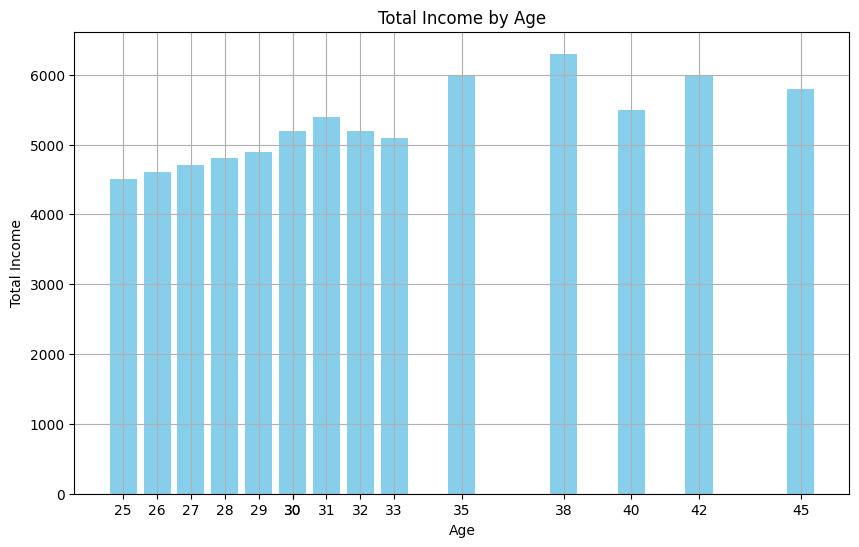

Ages with the highest income: [38]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a DataFrame
df = pd.read_csv('C:/Users/USER/Downloads/user_data.csv')

# Find the ages with the highest income
highest_income_age = df[df['Total Income'] == df['Total Income'].max()]['Age']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Age'], df['Total Income'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Total Income by Age')
plt.xticks(df['Age'])
plt.grid(True)
plt.show()

print("Ages with the highest income:", highest_income_age.values)


#The age with the highest income in this data is 38
Then follow by Age 35 and 42.

In [4]:
# Save the chart as an image
plt.savefig('total_income_by_age.png')

<Figure size 640x480 with 0 Axes>

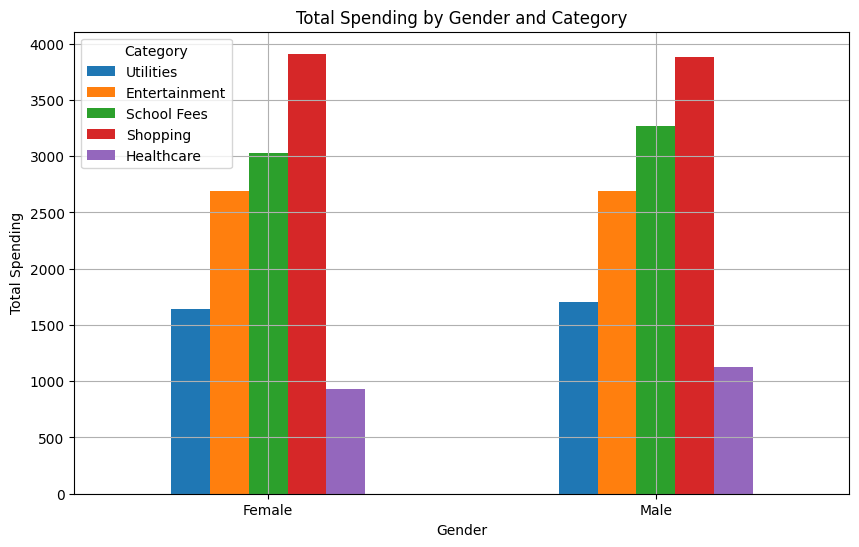

In [6]:
# Group by gender and calculate the total spending in each category
gender_spending = df.groupby('Gender').sum()[['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']]

# Plotting
gender_spending.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.title('Total Spending by Gender and Category')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.grid(True)
plt.show()

This total spending by Gender and Category provides some details,
In the case of utilities, the male spent more,
In the case of entertainment, it appears that both the male and the female spent the same thing
In the case of School fees, the male also spent more than the female
In the case of Shopping the female spent slightly more.
And finally, in the case of healthcare, the male spent more.

Studying what the individual gender spent on,
It is observed that the female went shopping more, giving us insight that the female like goodies more than every other thing, followed by schooling. This also apply to the male, however, that of the female is more.

In [5]:
# Save the chart as an image
plt.savefig('gender_spending_chart.png')

# Show the chart
plt.show()

<Figure size 640x480 with 0 Axes>

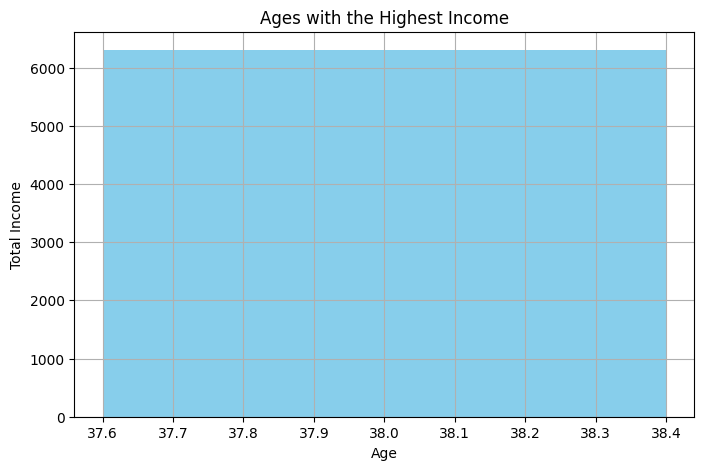

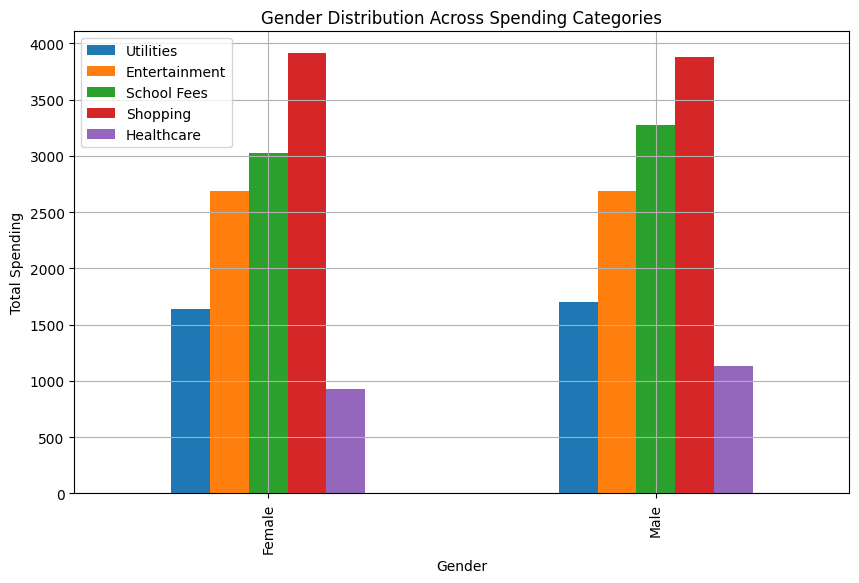

In [8]:
import matplotlib.pyplot as plt
import os

# Find the ages with the highest income
highest_income_ages = df[df['Total Income'] == df['Total Income'].max()]['Age']

# Plotting the ages with the highest income
plt.figure(figsize=(8, 5))
plt.bar(highest_income_ages, df['Total Income'].max(), color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.title('Ages with the Highest Income')
plt.grid(True)

# Specify the directory path
directory = "C:/Users/USER/Downloads/PowerPoint Presentation"

# Check if the directory exists, if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the chart as an image in the specified directory
plt.savefig(os.path.join(directory, 'highest_income_ages_chart.png'))

# Show the chart
plt.show()

# Gender distribution across spending categories
gender_spending = df.groupby('Gender')[['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']].sum()
gender_spending.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.title('Gender Distribution Across Spending Categories')
plt.grid(True)

# Save the chart as an image in the specified directory
plt.savefig(os.path.join(directory, 'gender_distribution_chart.png'))

# Show the chart
plt.show()
